In [29]:
# CODE FROM LAST CLASS

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting

torch.manual_seed(1) # set the random seed

class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

# load the data
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_train = list(mnist_train)[:2000]
img_to_tensor = transforms.ToTensor()

# create a new model, initialize random parameters
pigeon = Pigeon()

# loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

# training
for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    actual = (label < 3).reshape([1,1]).type(torch.FloatTensor)
    # prediction
    out = pigeon(img_to_tensor(image))
    # update the parameters based on the loss
    loss = criterion(out, actual) # compute the loss
    loss.backward()               # compute updates for each parameter
    optimizer.step()              # make the updates for each parameter
    optimizer.zero_grad()         # a clean up step for PyTorch

In [30]:
image

In [31]:
inval = img_to_tensor(image)

In [32]:
inval

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0235, 0.6314, 0.8353, 0.0627, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.4706, 0.9922, 0.9961,

In [33]:
inval.shape

torch.Size([1, 28, 28])

In [34]:
outval = pigeon(inval)

In [35]:
outval

tensor([[-2.3433]], grad_fn=<ThAddmmBackward>)

In [36]:
prob = torch.sigmoid(outval)

In [37]:
prob

tensor([[0.0876]], grad_fn=<SigmoidBackward>)

In [38]:
mnist_train = datasets.MNIST('data', train=True, download=True)


In [40]:
img, label = mnist_train[0]

In [41]:
img

In [42]:
label

tensor(5)

In [44]:
#img_to_tensor(img)

In [48]:
mnist_train = datasets.MNIST('data', train=True, download=True,
                             transform=transforms.ToTensor())
                             #transform=img_to_tensor)

In [49]:
img_tensor, label = mnist_train[0]

In [50]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=32)

In [59]:
for img_tensors, labels in train_loader:
    #print(img_tensors.shape)
    print(labels)
    out = pigeon(img_tensors)
    prob = torch.sigmoid(out)
    #print(prob.shape)
    print(prob)
    break

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])
tensor([[0.0075],
        [0.9746],
        [0.0339],
        [0.9749],
        [0.0022],
        [0.4031],
        [0.9636],
        [0.0011],
        [0.9194],
        [0.0008],
        [0.0007],
        [0.6907],
        [0.0003],
        [0.0235],
        [0.9654],
        [0.0002],
        [0.3899],
        [0.0013],
        [0.0254],
        [0.0004],
        [0.0020],
        [0.9770],
        [0.0009],
        [0.9378],
        [0.0118],
        [0.7110],
        [0.0002],
        [0.0001],
        [0.3602],
        [0.0051],
        [0.0287],
        [0.0704]], grad_fn=<SigmoidBackward>)


In [71]:
pigeon = Pigeon()
for img_tensors, labels in train_loader:
    out = pigeon(img_tensors)
    prob = torch.sigmoid(out)
    actual = (labels < 3).type(torch.FloatTensor).reshape([32, 1])
    
    loss = criterion(out, actual)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [74]:
pigeon = Pigeon()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

losses = [] # track the losses

for i, (img_tensors, labels) in enumerate(train_loader):
    if i > 1000:
        break
        
    out = pigeon(img_tensors)
    prob = torch.sigmoid(out)
    actual = (labels < 3).type(torch.FloatTensor).reshape([32, 1])
    
    loss = criterion(out, actual)
    losses.append(float(loss)) # track the loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

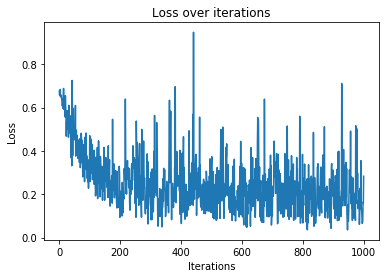

In [77]:
plt.plot(list(range(1001)), losses)
plt.title("Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

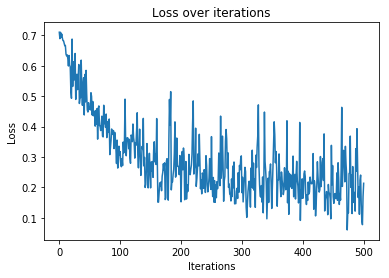

In [81]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64)
pigeon = Pigeon()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

losses = [] # track the losses
for i, (img_tensors, labels) in enumerate(train_loader):
    if i > 500:
        break
    out = pigeon(img_tensors)
    prob = torch.sigmoid(out)
    actual = (labels < 3).type(torch.FloatTensor).reshape([-1, 1])
    
    loss = criterion(out, actual)
    losses.append(float(loss)) # track the loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
plt.plot(list(range(501)), losses)
plt.title("Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()